In [2]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('Walmart/train.xlsx')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
df1 = df.drop('IsHoliday', axis=1)
df1.head()

,Store,Dept,Date,Weekly_Sales
0,1,1,2010-02-05,24924.50
1,1,1,2010-02-12,46039.49
2,1,1,2010-02-19,41595.55
3,1,1,2010-02-26,19403.54
4,1,1,2010-03-05,21827.90


In [6]:
df1.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
dtype: int64

In [7]:
df_limited = df1[(df1['Store']<=10) & (df1['Dept']<=10)]

In [8]:
df_limited.tail()

,Store,Dept,Date,Weekly_Sales
88949,10,10,2012-09-28,47821.03
88950,10,10,2012-10-05,46511.89
88951,10,10,2012-10-12,48684.03
88952,10,10,2012-10-19,46947.21
88953,10,10,2012-10-26,43637.06


In [9]:
# df_train = df_limited.iloc[:-20]
# split into train and test sets
train_size = int(len(df_limited) * 0.70)
test_size = len(df_limited) - train_size
train_size, test_size

(10010, 4290)

In [10]:
# df_train = df_limited.iloc[:train_size,:]
# df_test = df_limited.iloc[train_size:,:-1]
df_train = df_limited.iloc[:,:]
# df_test = df_limited.iloc[:,:]

In [11]:
df_train.tail()

,Store,Dept,Date,Weekly_Sales
88949,10,10,2012-09-28,47821.03
88950,10,10,2012-10-05,46511.89
88951,10,10,2012-10-12,48684.03
88952,10,10,2012-10-19,46947.21
88953,10,10,2012-10-26,43637.06


In [ ]:
# df_test.tail()

In [12]:
df_train.is_copy = False
# df_test.is_copy = False
df_train.index = pd.to_datetime(df_train['Date'])
df_train.drop('Date', axis=1, inplace=True)
# df_test.index = pd.to_datetime(df_test['Date'])
# df_test.drop('Date', axis=1, inplace=True)

In [13]:
df_train.head()

,Store,Dept,Weekly_Sales
Date,,,
2010-02-05,1,1,24924.50
2010-02-12,1,1,46039.49
2010-02-19,1,1,41595.55
2010-02-26,1,1,19403.54
2010-03-05,1,1,21827.90


In [14]:
from itertools import product, starmap


def storedepts():
    return product(range(1,11), range(1,11))
#     return product(range(1,51), range(1,11))


def storedepts_column_names():
    return list(starmap(lambda i,s: f'dept_{i}_store_{s}_sales', storedepts()))


def sales_by_storedept(df):
    ret = pd.DataFrame(index=df.index.unique())
    for i, s in storedepts():
#         print('i: '+ str(i) + ' s: '+str(s))
        ret[f'dept_{i}_store_{s}_sales'] = df[(df['Dept'] == i) & (df['Store'] == s)]['Weekly_Sales'].values
    return ret

In [15]:
ret1 = pd.DataFrame(index=df_train.index.unique())
ret1.head()

""
Date
2010-02-05
2010-02-12
2010-02-19
2010-02-26
2010-03-05


In [16]:
for i, s in storedepts():
    print('i: '+ str(i) + ' s: '+str(s))

i: 1 s: 1
i: 1 s: 2
i: 1 s: 3
i: 1 s: 4
i: 1 s: 5
i: 1 s: 6
i: 1 s: 7
i: 1 s: 8
i: 1 s: 9
i: 1 s: 10
i: 2 s: 1
i: 2 s: 2
i: 2 s: 3
i: 2 s: 4
i: 2 s: 5
i: 2 s: 6
i: 2 s: 7
i: 2 s: 8
i: 2 s: 9
i: 2 s: 10
i: 3 s: 1
i: 3 s: 2
i: 3 s: 3
i: 3 s: 4
i: 3 s: 5
i: 3 s: 6
i: 3 s: 7
i: 3 s: 8
i: 3 s: 9
i: 3 s: 10
i: 4 s: 1
i: 4 s: 2
i: 4 s: 3
i: 4 s: 4
i: 4 s: 5
i: 4 s: 6
i: 4 s: 7
i: 4 s: 8
i: 4 s: 9
i: 4 s: 10
i: 5 s: 1
i: 5 s: 2
i: 5 s: 3
i: 5 s: 4
i: 5 s: 5
i: 5 s: 6
i: 5 s: 7
i: 5 s: 8
i: 5 s: 9
i: 5 s: 10
i: 6 s: 1
i: 6 s: 2
i: 6 s: 3
i: 6 s: 4
i: 6 s: 5
i: 6 s: 6
i: 6 s: 7
i: 6 s: 8
i: 6 s: 9
i: 6 s: 10
i: 7 s: 1
i: 7 s: 2
i: 7 s: 3
i: 7 s: 4
i: 7 s: 5
i: 7 s: 6
i: 7 s: 7
i: 7 s: 8
i: 7 s: 9
i: 7 s: 10
i: 8 s: 1
i: 8 s: 2
i: 8 s: 3
i: 8 s: 4
i: 8 s: 5
i: 8 s: 6
i: 8 s: 7
i: 8 s: 8
i: 8 s: 9
i: 8 s: 10
i: 9 s: 1
i: 9 s: 2
i: 9 s: 3
i: 9 s: 4
i: 9 s: 5
i: 9 s: 6
i: 9 s: 7
i: 9 s: 8
i: 9 s: 9
i: 9 s: 10
i: 10 s: 1
i: 10 s: 2
i: 10 s: 3
i: 10 s: 4
i: 10 s: 5
i: 10 s: 6
i: 10 s: 7
i: 10 s: 8
i: 

In [17]:
df_train = sales_by_storedept(df_train)
df_train.head()
# for test set, we just fill y values with zeros (they won't be used anyway)
# df_test['sales'] = np.zeros(df_test.shape[0])

,dept_1_store_1_sales,dept_1_store_2_sales,dept_1_store_3_sales,dept_1_store_4_sales,dept_1_store_5_sales,dept_1_store_6_sales,dept_1_store_7_sales,dept_1_store_8_sales,dept_1_store_9_sales,dept_1_store_10_sales,...,dept_10_store_1_sales,dept_10_store_2_sales,dept_10_store_3_sales,dept_10_store_4_sales,dept_10_store_5_sales,dept_10_store_6_sales,dept_10_store_7_sales,dept_10_store_8_sales,dept_10_store_9_sales,dept_10_store_10_sales
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,35034.06,6453.58,38724.42,9323.89,25619.00,8970.97,16181.89,12861.40,40212.84,...,30721.50,39602.47,11396.86,34932.26,8372.87,43843.57,19127.16,28716.87,11502.28,48027.87
2010-02-12,46039.49,60483.70,12748.72,69872.44,16861.10,43749.81,14026.65,34262.09,20273.94,67699.32,...,31494.77,37984.44,9630.52,31909.34,8395.71,43192.85,17155.05,19845.83,11958.70,50595.72
2010-02-19,41595.55,58221.52,8918.31,49937.09,11417.67,34750.82,12477.79,22319.25,14819.97,49748.33,...,29634.13,38889.43,10805.61,32497.59,9058.00,48176.55,20378.37,22886.99,13102.37,51199.72
2010-02-26,19403.54,25962.32,4992.00,30107.54,7168.41,19896.08,8602.73,11722.71,10530.98,33601.22,...,27921.96,41137.74,9937.75,35973.26,8683.35,40644.91,21141.66,18627.73,9743.75,50028.83
2010-03-05,21827.90,27372.05,5172.73,31580.69,8344.13,22839.36,9541.12,12979.74,10438.47,36572.44,...,33299.27,39883.50,8918.95,34636.78,10710.30,48687.86,18402.64,23429.26,10665.10,49892.15


In [18]:
def shift_series(series, days):
    return series.transform(lambda x: x.shift(days))


def shift_series_in_df(df, series_names=[], days_delta=90):
    ret = pd.DataFrame(index=df.index.copy())
    str_sgn = 'future' if np.sign(days_delta) < 0 else 'past'
    for sn in series_names:
        ret[f'{sn}_{str_sgn}_{np.abs(days_delta)}'] = shift_series(df[sn], days_delta)
    return ret

    
def stack_shifted_sales(df, days_deltas=[1, 90, 360]):
    names = storedepts_column_names()
    dfs = [df.copy()]
    for delta in days_deltas:
        shifted = shift_series_in_df(df, series_names=names, days_delta=delta)
        dfs.append(shifted)
#     return pd.concat(dfs, axis=1, sort=False, copy=False)
    return pd.concat(dfs, axis=1, copy=False)

In [19]:
df_train = stack_shifted_sales(df_train, days_deltas=[1])
df_train.dropna(inplace=True)

In [20]:
df_train.columns

Index(['dept_1_store_1_sales', 'dept_1_store_2_sales', 'dept_1_store_3_sales',
       'dept_1_store_4_sales', 'dept_1_store_5_sales', 'dept_1_store_6_sales',
       'dept_1_store_7_sales', 'dept_1_store_8_sales', 'dept_1_store_9_sales',
       'dept_1_store_10_sales',
       ...
       'dept_10_store_1_sales_past_1', 'dept_10_store_2_sales_past_1',
       'dept_10_store_3_sales_past_1', 'dept_10_store_4_sales_past_1',
       'dept_10_store_5_sales_past_1', 'dept_10_store_6_sales_past_1',
       'dept_10_store_7_sales_past_1', 'dept_10_store_8_sales_past_1',
       'dept_10_store_9_sales_past_1', 'dept_10_store_10_sales_past_1'],
      dtype='object', length=200)

In [21]:
df_train.head()

,dept_1_store_1_sales,dept_1_store_2_sales,dept_1_store_3_sales,dept_1_store_4_sales,dept_1_store_5_sales,dept_1_store_6_sales,dept_1_store_7_sales,dept_1_store_8_sales,dept_1_store_9_sales,dept_1_store_10_sales,...,dept_10_store_1_sales_past_1,dept_10_store_2_sales_past_1,dept_10_store_3_sales_past_1,dept_10_store_4_sales_past_1,dept_10_store_5_sales_past_1,dept_10_store_6_sales_past_1,dept_10_store_7_sales_past_1,dept_10_store_8_sales_past_1,dept_10_store_9_sales_past_1,dept_10_store_10_sales_past_1
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-12,46039.49,60483.70,12748.72,69872.44,16861.10,43749.81,14026.65,34262.09,20273.94,67699.32,...,30721.50,39602.47,11396.86,34932.26,8372.87,43843.57,19127.16,28716.87,11502.28,48027.87
2010-02-19,41595.55,58221.52,8918.31,49937.09,11417.67,34750.82,12477.79,22319.25,14819.97,49748.33,...,31494.77,37984.44,9630.52,31909.34,8395.71,43192.85,17155.05,19845.83,11958.70,50595.72
2010-02-26,19403.54,25962.32,4992.00,30107.54,7168.41,19896.08,8602.73,11722.71,10530.98,33601.22,...,29634.13,38889.43,10805.61,32497.59,9058.00,48176.55,20378.37,22886.99,13102.37,51199.72
2010-03-05,21827.90,27372.05,5172.73,31580.69,8344.13,22839.36,9541.12,12979.74,10438.47,36572.44,...,27921.96,41137.74,9937.75,35973.26,8683.35,40644.91,21141.66,18627.73,9743.75,50028.83
2010-03-12,21043.39,28660.87,5540.28,29452.49,7531.45,24071.96,9538.70,12305.83,11004.74,36380.70,...,33299.27,39883.50,8918.95,34636.78,10710.30,48687.86,18402.64,23429.26,10665.10,49892.15


In [22]:
df_test = df_train.iloc[-12:,:]
df_test.is_copy = False
df_test.iloc[:,:] = 0
# df_test = sales_by_storedept(df_test)
len(df_test)

12

In [23]:
df_test

,dept_1_store_1_sales,dept_1_store_2_sales,dept_1_store_3_sales,dept_1_store_4_sales,dept_1_store_5_sales,dept_1_store_6_sales,dept_1_store_7_sales,dept_1_store_8_sales,dept_1_store_9_sales,dept_1_store_10_sales,...,dept_10_store_1_sales_past_1,dept_10_store_2_sales_past_1,dept_10_store_3_sales_past_1,dept_10_store_4_sales_past_1,dept_10_store_5_sales_past_1,dept_10_store_6_sales_past_1,dept_10_store_7_sales_past_1,dept_10_store_8_sales_past_1,dept_10_store_9_sales_past_1,dept_10_store_10_sales_past_1
Date,,,,,,,,,,,,,,,,,,,,,
2012-08-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-08-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-08-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-09-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-09-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-09-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-09-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [25]:
scaler = MinMaxScaler(feature_range=(0,1))
# scaler.data_range
cols_to_scale = [col for col in df_train.columns]
scaled_cols = scaler.fit_transform(df_train[cols_to_scale])
df_train[cols_to_scale] = scaled_cols
cols_to_scale

['dept_1_store_1_sales',
 'dept_1_store_2_sales',
 'dept_1_store_3_sales',
 'dept_1_store_4_sales',
 'dept_1_store_5_sales',
 'dept_1_store_6_sales',
 'dept_1_store_7_sales',
 'dept_1_store_8_sales',
 'dept_1_store_9_sales',
 'dept_1_store_10_sales',
 'dept_2_store_1_sales',
 'dept_2_store_2_sales',
 'dept_2_store_3_sales',
 'dept_2_store_4_sales',
 'dept_2_store_5_sales',
 'dept_2_store_6_sales',
 'dept_2_store_7_sales',
 'dept_2_store_8_sales',
 'dept_2_store_9_sales',
 'dept_2_store_10_sales',
 'dept_3_store_1_sales',
 'dept_3_store_2_sales',
 'dept_3_store_3_sales',
 'dept_3_store_4_sales',
 'dept_3_store_5_sales',
 'dept_3_store_6_sales',
 'dept_3_store_7_sales',
 'dept_3_store_8_sales',
 'dept_3_store_9_sales',
 'dept_3_store_10_sales',
 'dept_4_store_1_sales',
 'dept_4_store_2_sales',
 'dept_4_store_3_sales',
 'dept_4_store_4_sales',
 'dept_4_store_5_sales',
 'dept_4_store_6_sales',
 'dept_4_store_7_sales',
 'dept_4_store_8_sales',
 'dept_4_store_9_sales',
 'dept_4_store_10_sale

In [ ]:
df_train.head()

In [27]:
X_cols = [col for col in df_train.columns if '_past_' in col]
X = df_train[X_cols]

In [28]:
X

,dept_1_store_1_sales_past_1,dept_1_store_2_sales_past_1,dept_1_store_3_sales_past_1,dept_1_store_4_sales_past_1,dept_1_store_5_sales_past_1,dept_1_store_6_sales_past_1,dept_1_store_7_sales_past_1,dept_1_store_8_sales_past_1,dept_1_store_9_sales_past_1,dept_1_store_10_sales_past_1,...,dept_10_store_1_sales_past_1,dept_10_store_2_sales_past_1,dept_10_store_3_sales_past_1,dept_10_store_4_sales_past_1,dept_10_store_5_sales_past_1,dept_10_store_6_sales_past_1,dept_10_store_7_sales_past_1,dept_10_store_8_sales_past_1,dept_10_store_9_sales_past_1,dept_10_store_10_sales_past_1
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-12,0.432776,0.423290,0.340216,0.421074,0.441618,0.409612,0.361776,0.334439,0.459445,0.286137,...,0.702719,0.809423,0.733092,0.664614,0.627198,0.669540,0.550012,0.990894,0.665085,0.838792
2010-02-19,0.799406,0.730779,0.672080,0.759765,0.798611,0.699498,0.565658,0.708111,0.724242,0.481718,...,0.720407,0.776352,0.619474,0.607100,0.628909,0.659603,0.493303,0.684793,0.691476,0.883639
2010-02-26,0.722244,0.703447,0.470151,0.542996,0.540788,0.555617,0.503196,0.461282,0.529411,0.353987,...,0.677847,0.794849,0.695061,0.618292,0.678520,0.735710,0.585991,0.789730,0.757605,0.894187
2010-03-05,0.336913,0.313683,0.263166,0.327377,0.339526,0.318110,0.346925,0.242279,0.376196,0.239091,...,0.638683,0.840802,0.639237,0.684419,0.650455,0.620693,0.607940,0.642762,0.563403,0.873738
2010-03-12,0.379008,0.330716,0.272693,0.343396,0.395213,0.365169,0.384768,0.268258,0.372891,0.260233,...,0.761682,0.815167,0.573703,0.658992,0.802291,0.743518,0.529178,0.808442,0.616677,0.871351
2010-03-19,0.365387,0.346288,0.292069,0.320255,0.356721,0.384877,0.384671,0.254330,0.393120,0.258869,...,0.645225,0.809425,0.660957,0.650688,0.704694,0.820573,0.587031,0.709041,0.674363,0.853433
2010-03-26,0.384369,0.343703,0.269814,0.335486,0.412981,0.429564,0.472873,0.258763,0.350579,0.272187,...,0.771576,0.888511,0.584021,0.650545,0.664798,0.839468,0.607738,0.732301,0.716150,0.864137
2010-04-02,0.455431,0.389217,0.348996,0.363191,0.471068,0.452339,0.461857,0.325807,0.407321,0.369701,...,0.718398,0.662081,0.594832,0.589688,0.652580,0.660699,0.590336,0.545269,0.631649,0.800518
2010-04-09,0.994206,1.000000,0.864514,0.821339,1.000000,1.000000,0.827455,0.764264,0.864693,0.938207,...,0.727252,0.897317,0.598115,0.570768,0.856501,0.856062,0.513779,0.710148,0.730336,0.899763


In [29]:
y_cols = [col for col in df_train.columns if col not in set(X_cols)]

In [30]:
y_cols

['dept_1_store_1_sales',
 'dept_1_store_2_sales',
 'dept_1_store_3_sales',
 'dept_1_store_4_sales',
 'dept_1_store_5_sales',
 'dept_1_store_6_sales',
 'dept_1_store_7_sales',
 'dept_1_store_8_sales',
 'dept_1_store_9_sales',
 'dept_1_store_10_sales',
 'dept_2_store_1_sales',
 'dept_2_store_2_sales',
 'dept_2_store_3_sales',
 'dept_2_store_4_sales',
 'dept_2_store_5_sales',
 'dept_2_store_6_sales',
 'dept_2_store_7_sales',
 'dept_2_store_8_sales',
 'dept_2_store_9_sales',
 'dept_2_store_10_sales',
 'dept_3_store_1_sales',
 'dept_3_store_2_sales',
 'dept_3_store_3_sales',
 'dept_3_store_4_sales',
 'dept_3_store_5_sales',
 'dept_3_store_6_sales',
 'dept_3_store_7_sales',
 'dept_3_store_8_sales',
 'dept_3_store_9_sales',
 'dept_3_store_10_sales',
 'dept_4_store_1_sales',
 'dept_4_store_2_sales',
 'dept_4_store_3_sales',
 'dept_4_store_4_sales',
 'dept_4_store_5_sales',
 'dept_4_store_6_sales',
 'dept_4_store_7_sales',
 'dept_4_store_8_sales',
 'dept_4_store_9_sales',
 'dept_4_store_10_sale

In [31]:
y = df_train[y_cols]

In [32]:
y

,dept_1_store_1_sales,dept_1_store_2_sales,dept_1_store_3_sales,dept_1_store_4_sales,dept_1_store_5_sales,dept_1_store_6_sales,dept_1_store_7_sales,dept_1_store_8_sales,dept_1_store_9_sales,dept_1_store_10_sales,...,dept_10_store_1_sales,dept_10_store_2_sales,dept_10_store_3_sales,dept_10_store_4_sales,dept_10_store_5_sales,dept_10_store_6_sales,dept_10_store_7_sales,dept_10_store_8_sales,dept_10_store_9_sales,dept_10_store_10_sales
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-12,0.799406,0.730779,0.672080,0.759765,0.798611,0.699498,0.565658,0.708111,0.724242,0.481718,...,0.720407,0.776352,0.619474,0.607100,0.628909,0.659603,0.493303,0.684793,0.691476,0.883639
2010-02-19,0.722244,0.703447,0.470151,0.542996,0.540788,0.555617,0.503196,0.461282,0.529411,0.353987,...,0.677847,0.794849,0.695061,0.618292,0.678520,0.735710,0.585991,0.789730,0.757605,0.894187
2010-02-26,0.336913,0.313683,0.263166,0.327377,0.339526,0.318110,0.346925,0.242279,0.376196,0.239091,...,0.638683,0.840802,0.639237,0.684419,0.650455,0.620693,0.607940,0.642762,0.563403,0.873738
2010-03-05,0.379008,0.330716,0.272693,0.343396,0.395213,0.365169,0.384768,0.268258,0.372891,0.260233,...,0.761682,0.815167,0.573703,0.658992,0.802291,0.743518,0.529178,0.808442,0.616677,0.871351
2010-03-12,0.365387,0.346288,0.292069,0.320255,0.356721,0.384877,0.384671,0.254330,0.393120,0.258869,...,0.645225,0.809425,0.660957,0.650688,0.704694,0.820573,0.587031,0.709041,0.674363,0.853433
2010-03-19,0.384369,0.343703,0.269814,0.335486,0.412981,0.429564,0.472873,0.258763,0.350579,0.272187,...,0.771576,0.888511,0.584021,0.650545,0.664798,0.839468,0.607738,0.732301,0.716150,0.864137
2010-03-26,0.455431,0.389217,0.348996,0.363191,0.471068,0.452339,0.461857,0.325807,0.407321,0.369701,...,0.718398,0.662081,0.594832,0.589688,0.652580,0.660699,0.590336,0.545269,0.631649,0.800518
2010-04-02,0.994206,1.000000,0.864514,0.821339,1.000000,1.000000,0.827455,0.764264,0.864693,0.938207,...,0.727252,0.897317,0.598115,0.570768,0.856501,0.856062,0.513779,0.710148,0.730336,0.899763
2010-04-09,0.745951,0.804194,0.438401,0.613452,0.725159,0.714614,0.550798,0.522996,0.479469,0.634763,...,0.743086,0.885824,0.592672,0.523949,0.765466,0.750470,0.553318,0.673983,0.707006,0.785658


In [37]:
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=False)
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [33]:
142*0.2

28.400000000000002

In [34]:
X_train = X.iloc[:-28,:]
y_train = y.iloc[:-28,:]
X_valid = X.iloc[-28:,:]
y_valid = y.iloc[-28:,:]

In [35]:
len(X_train), len(X_valid), len(y_train), len(y_valid)

(114, 28, 114, 28)

In [36]:
X_train_vals = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_valid_vals = X_valid.values.reshape((X_valid.shape[0], 1, X_valid.shape[1]))

In [37]:
X_train_vals.shape, X_valid_vals.shape

((114, 1, 100), (28, 1, 100))

In [38]:
from keras.models import Sequential, Model
from keras.layers import LSTM, Dense, Conv1D, Input, Dropout, AvgPool1D, Reshape, Concatenate

C:\Users\rahsood\AppData\Local\Continuum\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [39]:
X_train_vals = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_valid_vals = X_valid.values.reshape((X_valid.shape[0], 1, X_valid.shape[1]))

In [40]:
X_train_vals.shape[1], X_train_vals.shape[2]

(1, 100)

In [ ]:
# 3D Input_shape = number of records, time-steps, features
# 114, 1, 100

In [93]:
basic_model = Sequential()
basic_model.add(LSTM(100, input_shape=(X_train_vals.shape[1], X_train_vals.shape[2])))
# basic_model.add(LSTM(units=100, input_shape=(X_train_vals.shape[1], X_train_vals.shape[2]),return_sequences=True))
# basic_model.add(Dropout(0.1))
# basic_model.add(LSTM(units=100))
# basic_model.add(Dropout(0.1))
# basic_model.add(LSTM(100, input_shape=(X_train_vals.shape[1], X_train_vals.shape[2]), stateful=True))
basic_model.add(Dense(100))
basic_model.compile(loss='mean_absolute_error', optimizer='adam')

In [94]:
print(basic_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_21 (Dense)             (None, 100)               10100     
Total params: 90,500
Trainable params: 90,500
Non-trainable params: 0
_________________________________________________________________
None


In [70]:
print(basic_model.get_layer('lstm_12').output)

Tensor("lstm_12/TensorArrayReadV3:0", shape=(?, 100), dtype=float32)


In [95]:
basic_history = basic_model.fit(
    X_train_vals, 
    y_train.values, 
    epochs=300, 
    batch_size=30,
    validation_data=(X_valid_vals, y_valid.values),
    verbose=2,
    shuffle=False
)

Train on 114 samples, validate on 28 samples
Epoch 1/300
 - 1s - loss: 0.4452 - val_loss: 0.2836
Epoch 2/300
 - 0s - loss: 0.3867 - val_loss: 0.2841
Epoch 3/300
 - 0s - loss: 0.3232 - val_loss: 0.2893
Epoch 4/300
 - 0s - loss: 0.2575 - val_loss: 0.2921
Epoch 5/300
 - 0s - loss: 0.1970 - val_loss: 0.2972
Epoch 6/300
 - 0s - loss: 0.1540 - val_loss: 0.3015
Epoch 7/300
 - 0s - loss: 0.1266 - val_loss: 0.2881
Epoch 8/300
 - 0s - loss: 0.1004 - val_loss: 0.2698
Epoch 9/300
 - 0s - loss: 0.0865 - val_loss: 0.2620
Epoch 10/300
 - 0s - loss: 0.0824 - val_loss: 0.2645
Epoch 11/300
 - 0s - loss: 0.0794 - val_loss: 0.2644
Epoch 12/300
 - 0s - loss: 0.0765 - val_loss: 0.2587
Epoch 13/300
 - 0s - loss: 0.0744 - val_loss: 0.2533
Epoch 14/300
 - 0s - loss: 0.0729 - val_loss: 0.2525
Epoch 15/300
 - 0s - loss: 0.0717 - val_loss: 0.2531
Epoch 16/300
 - 0s - loss: 0.0708 - val_loss: 0.2519
Epoch 17/300
 - 0s - loss: 0.0700 - val_loss: 0.2501
Epoch 18/300
 - 0s - loss: 0.0696 - val_loss: 0.2486
Epoch 19/3

Epoch 154/300
 - 0s - loss: 0.0434 - val_loss: 0.2865
Epoch 155/300
 - 0s - loss: 0.0437 - val_loss: 0.2880
Epoch 156/300
 - 0s - loss: 0.0434 - val_loss: 0.2936
Epoch 157/300
 - 0s - loss: 0.0429 - val_loss: 0.2967
Epoch 158/300
 - 0s - loss: 0.0430 - val_loss: 0.2957
Epoch 159/300
 - 0s - loss: 0.0432 - val_loss: 0.2916
Epoch 160/300
 - 0s - loss: 0.0431 - val_loss: 0.2894
Epoch 161/300
 - 0s - loss: 0.0430 - val_loss: 0.2898
Epoch 162/300
 - 0s - loss: 0.0429 - val_loss: 0.2927
Epoch 163/300
 - 0s - loss: 0.0426 - val_loss: 0.2961
Epoch 164/300
 - 0s - loss: 0.0425 - val_loss: 0.2964
Epoch 165/300
 - 0s - loss: 0.0427 - val_loss: 0.2953
Epoch 166/300
 - 0s - loss: 0.0426 - val_loss: 0.2932
Epoch 167/300
 - 0s - loss: 0.0424 - val_loss: 0.2909
Epoch 168/300
 - 0s - loss: 0.0426 - val_loss: 0.2903
Epoch 169/300
 - 0s - loss: 0.0424 - val_loss: 0.2941
Epoch 170/300
 - 0s - loss: 0.0421 - val_loss: 0.2983
Epoch 171/300
 - 0s - loss: 0.0422 - val_loss: 0.2999
Epoch 172/300
 - 0s - loss: 

In [75]:
inputs = Input(shape=(X_train_vals.shape[1], X_train_vals.shape[2]))
# top pipeline
top_lstm = LSTM(100)(inputs)
top_dense = Dense(500, activation='relu')(top_lstm)
# top_dropout = Dropout(rate=0.1)(top_dense)
top_dropout = Dropout(500)(top_dense)
# bottom pipeline
bottom_dense = Dense(500)(inputs)
bottom_conv1 = Conv1D(500,kernel_size=1,input_shape=(X_train_vals.shape[1], X_train_vals.shape[2]))(bottom_dense)
bottom_conv2 = Conv1D(500,kernel_size=10,padding='same',activation='relu')(bottom_conv1)
bottom_conv3 = Conv1D(500,kernel_size=10,padding='same',activation='relu')(bottom_conv2)
bottom_pooling = AvgPool1D(pool_size=60,padding='same')(bottom_conv3)
bottom_reshape = Reshape(target_shape=[500])(bottom_pooling)
# concat output from both pipelines
final_concat = Concatenate()([top_dropout, bottom_reshape])
final_dense = Dense(100)(final_concat)

In [77]:
# compile and return
complex_model = Model(inputs=inputs, outputs=final_dense)

In [78]:
print(complex_model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 1, 100)       0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 1, 500)       50500       input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 1, 500)       250500      dense_19[0][0]                   
__________________________________________________________________________________________________
conv1d_14 (Conv1D)              (None, 1, 500)       2500500     conv1d_13[0][0]                  
__________________________________________________________________________________________________
lstm_15 (L

In [79]:
complex_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mape'])

In [43]:
y_valid

,dept_1_store_1_sales,dept_1_store_2_sales,dept_1_store_3_sales,dept_1_store_4_sales,dept_1_store_5_sales,dept_1_store_6_sales,dept_1_store_7_sales,dept_1_store_8_sales,dept_1_store_9_sales,dept_1_store_10_sales,...,dept_10_store_1_sales,dept_10_store_2_sales,dept_10_store_3_sales,dept_10_store_4_sales,dept_10_store_5_sales,dept_10_store_6_sales,dept_10_store_7_sales,dept_10_store_8_sales,dept_10_store_9_sales,dept_10_store_10_sales
Date,,,,,,,,,,,,,,,,,,,,,
2012-04-20,0.294766,0.272679,0.428664,0.284469,0.413002,0.275806,0.299522,0.215379,0.329872,0.190411,...,0.705390,0.800032,0.803401,0.733964,0.730091,0.736742,0.475605,0.707482,0.738075,0.772600
2012-04-27,0.283851,0.270816,0.376677,0.291543,0.445976,0.259031,0.263770,0.185619,0.312657,0.181618,...,0.673252,0.762032,0.809960,0.752443,0.846037,0.835987,0.516582,0.762278,0.878933,0.889992
2012-05-04,0.297739,0.274400,0.349811,0.298885,0.441407,0.293735,0.225415,0.202291,0.368202,0.184114,...,0.818899,0.833097,0.821761,0.771659,0.942525,0.857406,0.457705,0.753193,0.968396,0.807990
2012-05-11,0.315394,0.310045,0.305463,0.335320,0.401187,0.296981,0.260621,0.210017,0.347418,0.196474,...,0.738178,0.763017,0.866163,0.827161,0.768014,0.731904,0.488563,0.647038,0.893590,0.797246
2012-05-18,0.321533,0.313929,0.322696,0.311675,0.434770,0.314142,0.256094,0.213242,0.337524,0.188738,...,0.693974,0.797985,0.751055,0.722474,0.804966,0.623426,0.465915,0.709420,0.845745,0.878736
2012-05-25,0.294546,0.284673,0.354026,0.302508,0.434227,0.315855,0.264153,0.190019,0.346288,0.188005,...,0.782362,0.808173,0.882779,0.934151,0.760272,0.770774,0.487213,0.687668,0.863238,1.000000
2012-06-01,0.278953,0.278816,0.356150,0.294631,0.447243,0.307954,0.298833,0.199666,0.337414,0.176002,...,0.853060,0.820198,0.789210,0.858405,0.761685,0.877688,0.522752,0.797393,0.945067,0.860292
2012-06-08,0.306743,0.299957,0.389603,0.309066,0.421735,0.318053,0.281141,0.200845,0.331849,0.175422,...,0.827010,0.813004,0.958783,0.822640,0.835790,0.877539,0.496073,0.721208,0.843904,0.909209
2012-06-15,0.304882,0.290172,0.367233,0.333599,0.424964,0.324325,0.312462,0.204704,0.335034,0.173442,...,0.745198,0.770701,0.887649,0.753639,0.809579,0.779498,0.549859,0.703974,0.898609,0.917428


In [80]:
complex_history = complex_model.fit(
    X_train_vals, 
    y_train.values, 
    epochs=200, 
    batch_size=70,
    validation_data=(X_valid_vals, y_valid.values),
    verbose=2,
    shuffle=False
)

Train on 114 samples, validate on 28 samples
Epoch 1/200
 - 3s - loss: 0.2658 - mean_absolute_percentage_error: 10592.8642 - val_loss: 0.1168 - val_mean_absolute_percentage_error: 134540128.0000
Epoch 2/200
 - 2s - loss: 0.1367 - mean_absolute_percentage_error: 29651.4813 - val_loss: 0.1778 - val_mean_absolute_percentage_error: 232304848.0000
Epoch 3/200
 - 2s - loss: 0.0450 - mean_absolute_percentage_error: 9161.4953 - val_loss: 0.0870 - val_mean_absolute_percentage_error: 128011928.0000
Epoch 4/200
 - 2s - loss: 0.0556 - mean_absolute_percentage_error: 3255.8395 - val_loss: 0.0952 - val_mean_absolute_percentage_error: 133922648.0000
Epoch 5/200
 - 2s - loss: 0.0483 - mean_absolute_percentage_error: 7334.8136 - val_loss: 0.1380 - val_mean_absolute_percentage_error: 189298064.0000
Epoch 6/200
 - 2s - loss: 0.0397 - mean_absolute_percentage_error: 215.8419 - val_loss: 0.1616 - val_mean_absolute_percentage_error: 214848112.0000
Epoch 7/200
 - 2s - loss: 0.0321 - mean_absolute_percentage_

Epoch 56/200
 - 2s - loss: 0.0084 - mean_absolute_percentage_error: 11584.2905 - val_loss: 0.1180 - val_mean_absolute_percentage_error: 191084576.0000
Epoch 57/200
 - 2s - loss: 0.0083 - mean_absolute_percentage_error: 11686.3219 - val_loss: 0.1180 - val_mean_absolute_percentage_error: 190868192.0000
Epoch 58/200
 - 2s - loss: 0.0081 - mean_absolute_percentage_error: 11994.7172 - val_loss: 0.1178 - val_mean_absolute_percentage_error: 190607440.0000
Epoch 59/200
 - 2s - loss: 0.0079 - mean_absolute_percentage_error: 11958.4179 - val_loss: 0.1181 - val_mean_absolute_percentage_error: 190804224.0000
Epoch 60/200
 - 2s - loss: 0.0077 - mean_absolute_percentage_error: 12006.7292 - val_loss: 0.1176 - val_mean_absolute_percentage_error: 190363232.0000
Epoch 61/200
 - 2s - loss: 0.0075 - mean_absolute_percentage_error: 12081.4645 - val_loss: 0.1174 - val_mean_absolute_percentage_error: 190018928.0000
Epoch 62/200
 - 2s - loss: 0.0074 - mean_absolute_percentage_error: 12151.0909 - val_loss: 0.1

Epoch 111/200
 - 2s - loss: 0.0041 - mean_absolute_percentage_error: 14078.5810 - val_loss: 0.1206 - val_mean_absolute_percentage_error: 191564336.0000
Epoch 112/200
 - 2s - loss: 0.0040 - mean_absolute_percentage_error: 14249.4331 - val_loss: 0.1168 - val_mean_absolute_percentage_error: 187057872.0000
Epoch 113/200
 - 2s - loss: 0.0039 - mean_absolute_percentage_error: 14721.2491 - val_loss: 0.1151 - val_mean_absolute_percentage_error: 185390576.0000
Epoch 114/200
 - 2s - loss: 0.0039 - mean_absolute_percentage_error: 14534.8553 - val_loss: 0.1179 - val_mean_absolute_percentage_error: 188454816.0000
Epoch 115/200
 - 2s - loss: 0.0038 - mean_absolute_percentage_error: 14564.4819 - val_loss: 0.1200 - val_mean_absolute_percentage_error: 190553456.0000
Epoch 116/200
 - 2s - loss: 0.0038 - mean_absolute_percentage_error: 14586.3896 - val_loss: 0.1177 - val_mean_absolute_percentage_error: 188198560.0000
Epoch 117/200
 - 2s - loss: 0.0037 - mean_absolute_percentage_error: 14951.6930 - val_lo

Epoch 165/200
 - 2s - loss: 0.0024 - mean_absolute_percentage_error: 15204.7495 - val_loss: 0.1143 - val_mean_absolute_percentage_error: 183722144.0000
Epoch 166/200
 - 2s - loss: 0.0024 - mean_absolute_percentage_error: 14356.6254 - val_loss: 0.1144 - val_mean_absolute_percentage_error: 184208496.0000
Epoch 167/200
 - 2s - loss: 0.0023 - mean_absolute_percentage_error: 13734.4591 - val_loss: 0.1180 - val_mean_absolute_percentage_error: 188089248.0000
Epoch 168/200
 - 2s - loss: 0.0024 - mean_absolute_percentage_error: 14324.5800 - val_loss: 0.1186 - val_mean_absolute_percentage_error: 189015168.0000
Epoch 169/200
 - 2s - loss: 0.0024 - mean_absolute_percentage_error: 13242.7906 - val_loss: 0.1167 - val_mean_absolute_percentage_error: 186626128.0000
Epoch 170/200
 - 2s - loss: 0.0023 - mean_absolute_percentage_error: 14153.0102 - val_loss: 0.1128 - val_mean_absolute_percentage_error: 181985488.0000
Epoch 171/200
 - 2s - loss: 0.0024 - mean_absolute_percentage_error: 14981.9682 - val_lo

In [49]:
def plot_history(history):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

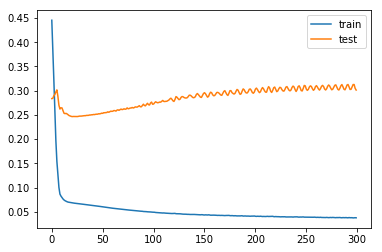

In [96]:
plot_history(basic_history)

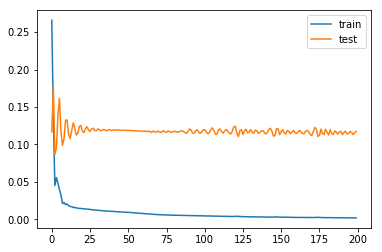

In [82]:
plot_history(complex_history)

In [52]:
def model_eval(model, X_test, y_test):
    """
    Evaluate (step-by-step) model predictions from X_test and return predictions and real values in comparable format.
    """
    # prepare data
    sales_x_cols = [col for col in X_test.columns if 'sales' in col]
    sales_x_idxs = [X_test.columns.get_loc(col) for col in sales_x_cols]
    sales_y_cols = [col for col in y_test.columns if 'sales' in col]
    sales_y_idxs = [y_test.columns.get_loc(col) for col in sales_y_cols]
    n_samples = y_test.shape[0]
    y_pred = np.zeros(y_test.shape)
    # iterate
    x_next = X_test.iloc[0].values
    for i in range(0, n_samples):
        x_arr = np.array([x_next])
        x_arr = x_arr.reshape(x_arr.shape[0], 1, x_arr.shape[1])
        y_pred[i] = model.predict(x_arr)[0] # input for prediction must be 2d, output is immediately extracted from 2d to 1d
        try:
            x_next = X_test.iloc[i+1].values
            x_next[sales_x_idxs] = y_pred[i][sales_y_idxs]
        except IndexError:
            pass  # this happens on last iteration, and x_next does not matter anymore
    return y_pred, y_test.values


def unscale(y_arr, scaler, template_df, toint=False):
    """
    Unscale array y_arr of model predictions, based on a scaler fitted 
    to template_df.
    """
    tmp = template_df.copy()
    tmp[y_cols] = pd.DataFrame(y_arr, index=tmp.index)
    tmp[cols_to_scale] = scaler.inverse_transform(tmp[cols_to_scale])
    if toint:
        return tmp[y_cols].astype(int)
    return tmp[y_cols]


def vector_smape(y_pred, y_real):
    nom = np.abs(y_pred-y_real)
    denom = (np.abs(y_pred) + np.abs(y_real)) / 2
    results = nom / denom
    return 100*np.mean(results)  # in percent, same as at kaggle

In [97]:
y_pred_basic, y_real = model_eval(basic_model, X_valid, y_valid)

In [84]:
y_pred_complex = model_eval(complex_model, X_valid, y_valid)[0]

In [98]:
# this is just for unscaling
template_df = pd.concat([X_valid, y_valid], axis=1)
template_df['is_test'] = np.repeat(True, template_df.shape[0])

In [99]:
basic_pred = unscale(y_pred_basic, scaler, template_df, toint=True)
complex_pred = unscale(y_pred_complex, scaler, template_df, toint=True)
real = unscale(y_real, scaler, template_df, toint=True)

In [100]:
basic_smapes = [vector_smape(basic_pred[col], real[col]) for col in basic_pred.columns]
complex_smapes = [vector_smape(complex_pred[col], real[col]) for col in complex_pred.columns]

In [ ]:
(basic_pred - real) / real

In [89]:
store, dept = 2,3
# plot_lengths = [7, 28, 90]
plot_lengths = [28]
rolling_mean_windows = [1, 1, 2]  # to make plots more readable

In [58]:
color_scheme = {
    'red': '#F1637A',
    'green': '#6ABB3E',
    'blue': '#3D8DEA',
    'black': '#000000'
}

dept_1_store_2_sales


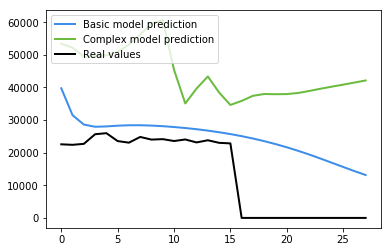

dept_3_store_4_sales


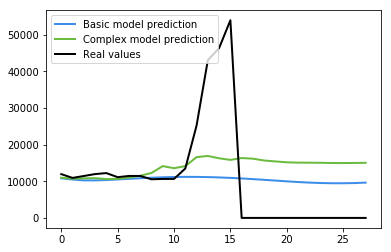

dept_5_store_6_sales


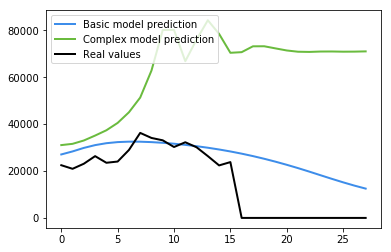

In [101]:
import matplotlib.pyplot as plt
combo = [[1,2],[3,4],[5,6]]
plot_lengths = [28]
rolling_mean_windows = [1, 1, 2]  # to make plots more readable
for dept,store in combo:
    storedept_col = f'dept_{dept}_store_{store}_sales'
    print(storedept_col)
    for pl, mw in zip(plot_lengths, rolling_mean_windows):
        plt.plot(basic_pred[storedept_col].rolling(mw).mean().values[:pl],
             color_scheme['blue'],
             lw=2,
             label='Basic model prediction')
        plt.plot(complex_pred[storedept_col].rolling(mw).mean().values[:pl],
             color_scheme['green'],
             lw=2, 
             label='Complex model prediction')
        plt.plot(real[storedept_col].rolling(mw).mean().values[:pl],
             color_scheme['black'],
             lw=2, 
             label='Real values')
        plt.legend(loc='upper left')
        plt.savefig(f'plot_prediction_{pl}_{mw}.svg')
        plt.show()

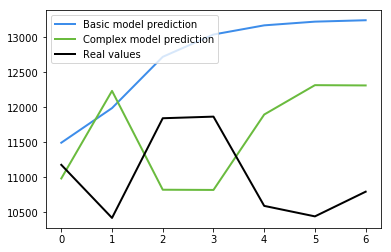

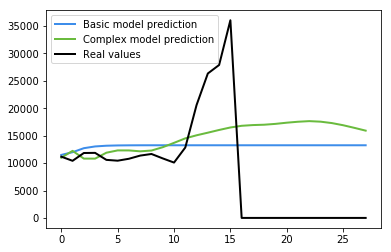

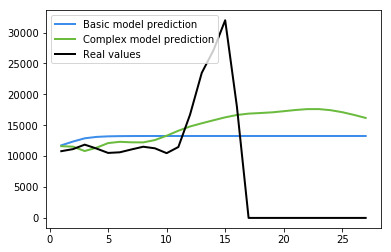

In [137]:
storedept_col = f'dept_{dept}_store_{store}_sales'

for pl, mw in zip(plot_lengths, rolling_mean_windows):
    plt.plot(basic_pred[storedept_col].rolling(mw).mean().values[:pl],
             color_scheme['blue'],
             lw=2,
             label='Basic model prediction')
    plt.plot(complex_pred[storedept_col].rolling(mw).mean().values[:pl],
             color_scheme['green'],
             lw=2, 
             label='Complex model prediction')
    plt.plot(real[storedept_col].rolling(mw).mean().values[:pl],
             color_scheme['black'],
             lw=2, 
             label='Real values')
    plt.legend(loc='upper left')
    plt.savefig(f'plot_prediction_{pl}_{mw}.svg')
    plt.show()

In [ ]:

storedept_col = f'dept_{dept}_store_{store}_sales'

for pl, mw in zip(plot_lengths, rolling_mean_windows):
    plt.plot(basic_pred[storedept_col].rolling(mw).mean().values[:pl],
             color_scheme['blue'],
             lw=2,
             label='Basic model prediction')
    plt.plot(complex_pred[storedept_col].rolling(mw).mean().values[:pl],
             color_scheme['green'],
             lw=2, 
             label='Complex model prediction')
    plt.plot(real[storedept_col].rolling(mw).mean().values[:pl],
             color_scheme['black'],
             lw=2, 
             label='Real values')
    plt.legend(loc='upper left')
    plt.savefig(f'plot_prediction_{pl}_{mw}.svg')
    plt.show()